In [136]:
%cd /home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes

import matplotlib.pyplot as plt


import sys, os
sys.path.append('/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes')
from source.load_sbml.sbml_load import *
from source.load_sbml.sbml_model import SBMLModel
import logging
import logging, sys
logging.disable(sys.maxsize)
import pylab


def flatten(xss):
    return [x for xs in xss for x in xs]


/home/plent/Documenten/Gitlab/NeuralODEs/jax_neural_odes


ModuleNotFoundError: No module named 'seaborn'

In [123]:
#load all models (from different subdirectories. 
# These are a classification of the sbml loader status in diffrax,not on the models itself)
model_names=os.listdir("models/sbml_models/working_models/")

all_params=[]
labels=[]
label_count=0
for i in range(len(model_names)):
    filepath = f"models/sbml_models/working_models/{model_names[i]}"
    model = SBMLModel(filepath)
    params = get_global_parameters(model.model)
    params = {**model.local_params, **params}
    params=np.array(list(params.values()))
    all_params.append(params)
    labels.append(np.ones(len(params))*label_count)
    label_count+=1

model_names=os.listdir("models/sbml_models/discrepancies/")
for i in range(len(model_names)):
    filepath = f"models/sbml_models/discrepancies/{model_names[i]}"
    model = SBMLModel(filepath)
    params = get_global_parameters(model.model)
    params = {**model.local_params, **params}
    params=np.array(list(params.values()))
    all_params.append(params)
    labels.append(np.ones(len(params))*label_count)
    label_count+=1


model_names=os.listdir("models/sbml_models/failing_models/")
for i in range(len(model_names)):

    filepath = f"models/sbml_models/failing_models/{model_names[i]}"
    model = SBMLModel(filepath)
    params = get_global_parameters(model.model)
    params = {**model.local_params, **params}
    params=np.array(list(params.values()))
    all_params.append(params)
    labels.append(np.ones(len(params))*label_count)
    label_count+=1


model_names=os.listdir("models/sbml_models/max_steps_reached/")
for i in range(len(model_names)):

    filepath = f"models/sbml_models/max_steps_reached/{model_names[i]}"
    model = SBMLModel(filepath)
    params = get_global_parameters(model.model)
    params = {**model.local_params, **params}
    params=np.array(list(params.values()))
    all_params.append(params)
    labels.append(np.ones(len(params))*label_count)
    label_count+=1

flattened_params=flatten(all_params)

Constant Boundary Specimen  ACE
Constant Boundary Specimen  EtOH
Constant Boundary Specimen  F26bP
Constant Boundary Specimen  GLCx
Constant Boundary Specimen  GLY
Constant Boundary Specimen  SUC
Constant Boundary Specimen  TRH
Constant Boundary Specimen  ADH1
Constant Boundary Specimen  CDC19
Constant Boundary Specimen  ENO1
Constant Boundary Specimen  ENO2
Constant Boundary Specimen  FBA1
Constant Boundary Specimen  GLK1
Constant Boundary Specimen  GPD1
Constant Boundary Specimen  GPD2
Constant Boundary Specimen  GPM1
Constant Boundary Specimen  HOR2
Constant Boundary Specimen  HXK1
Constant Boundary Specimen  HXK2
Constant Boundary Specimen  PDC1
Constant Boundary Specimen  PDC5
Constant Boundary Specimen  PDC6
Constant Boundary Specimen  PFK1
Constant Boundary Specimen  PFK2
Constant Boundary Specimen  PGI1
Constant Boundary Specimen  PGK1
Constant Boundary Specimen  PGM1
Constant Boundary Specimen  PGM2
Constant Boundary Specimen  RHR2
Constant Boundary Specimen  TDH1
Constant Bou

In [124]:

flattened_labels=np.array(flatten(labels))
flattened_params=np.array(flattened_params)




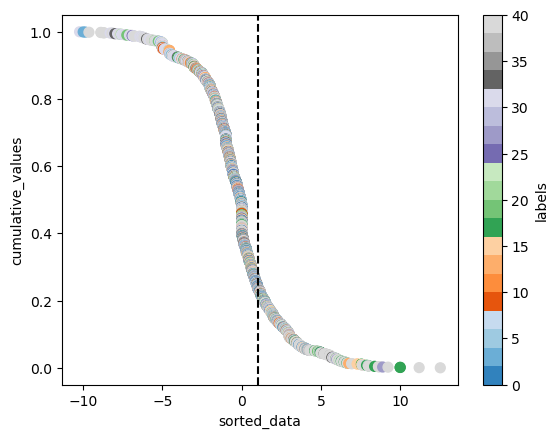

In [159]:
def generate_colors(num_colors):
    # Use the 'tab20' colormap from Matplotlib
    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]
    return colors


    # Sort data and compute the cumulative distribution values
params=flattened_params[flattened_params>(1/(2**40))]
labels=flattened_labels[flattened_params>(1/(2**40))]

sorted_data_log=np.log10(params)

sorted_data = np.sort(sorted_data_log)
cumulative_values = 1-np.arange(1, len(sorted_data_log) + 1) / len(sorted_data_log)

argsort_data=np.argsort(sorted_data_log)

df=pd.DataFrame({"sorted_data":sorted_data,
                 "cumulative_values":cumulative_values,
                 "labels":labels[argsort_data]})


df.plot(kind="scatter",x="sorted_data",y="cumulative_values",c="labels",cmap="tab20c",s=50)
plt.axvline(1,linestyle="--",c="black")

# sns.scatterplot(data=df, x='cumulative_values', y='params', hue='labels')
# colors = generate_colors(41)
# plt.figure(figsize=(4, 4))
# plt.plot(sorted_data, np.log2(cumulative_values),c=colors,cmap=plt.cm.tab20c, marker='.', linestyle='none')
# plt.xlabel("parameter values on the log scale")
# plt.ticklabel_format(axis="both",style="sci")

In [132]:
np.unique(labels)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.])